## Letter Model: LDA

## Resources

In [1]:
import pickle
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

In [2]:
import logging
logging.basicConfig(filename='gensim.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

In [11]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize = 600,
                                           passes=20,
                                           iterations=400,
                                           alpha='auto',
                                           eta='auto',
                                           eval_every = None,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [3]:
# Get it back
with open("20240405_PhD_LtrLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)

In [4]:
len(data_lemmatizedNouns[0])

273

In [5]:
# Get it back
with open("20240405_PhD_LtrLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

In [6]:
len(data_lemmatized[0])

461

## LDA Model (Nouns Only)

In [7]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [8]:
# View
#print(corpus[:1])

In [9]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6739 unique tokens: ['abide', 'accompany', 'angel', 'annoyance', 'answer']...)


In [10]:
# This is the whole human readable list with frequencies
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [12]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

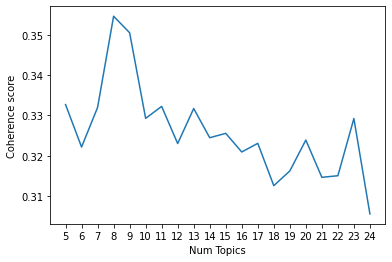

In [13]:
# Show graph
start = 5
limit = 25
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

## LDA Model (Nouns and Verbs)

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [19]:
# View
#print(corpus[:1])

In [20]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(8083 unique tokens: ['abide', 'accompany', 'act', 'agree', 'aim']...)


In [21]:
# This is the whole human readable list with frequencies
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [22]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=25, 
                                                        step=1)

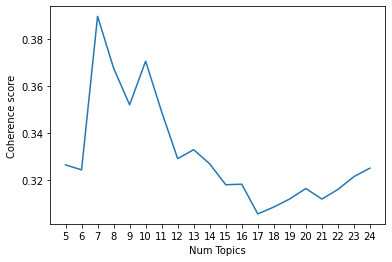

In [23]:
# Show graph
start = 5
limit = 25
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

The convergence scores for the noun-verb set are higher so let's dig into those.

In [24]:
# Print the coherence 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3265
Num Topics = 6 Coherence:  0.3244
Num Topics = 7 Coherence:  0.3897
Num Topics = 8 Coherence:  0.3677
Num Topics = 9 Coherence:  0.3521
Num Topics = 10 Coherence:  0.3706
Num Topics = 11 Coherence:  0.3491
Num Topics = 12 Coherence:  0.3292
Num Topics = 13 Coherence:  0.333
Num Topics = 14 Coherence:  0.3269
Num Topics = 15 Coherence:  0.3181
Num Topics = 16 Coherence:  0.3183
Num Topics = 17 Coherence:  0.3056
Num Topics = 18 Coherence:  0.3086
Num Topics = 19 Coherence:  0.312
Num Topics = 20 Coherence:  0.3165
Num Topics = 21 Coherence:  0.312
Num Topics = 22 Coherence:  0.3161
Num Topics = 23 Coherence:  0.3215
Num Topics = 24 Coherence:  0.3251


In [25]:
print("Coherence score for 7-topic model", coherence_values[2], "\n")

# View the topics
GensimLDA_07 = model_list[2]
pprint(sorted(GensimLDA_07.print_topics(num_words=10)))

Coherence score for 7-topic model 0.38974249249046905 

[(0,
  '0.010*"people" + 0.009*"dollar" + 0.008*"place" + 0.008*"country" + '
  '0.007*"year" + 0.007*"city" + 0.007*"state" + 0.006*"day" + 0.006*"house" + '
  '0.006*"land"'),
 (1,
  '0.012*"take" + 0.012*"day" + 0.011*"come" + 0.011*"school" + 0.009*"time" + '
  '0.009*"give" + 0.009*"go" + 0.007*"week" + 0.007*"look" + 0.006*"child"'),
 (2,
  '0.013*"send" + 0.013*"hear" + 0.013*"letter" + 0.011*"write" + 0.010*"year" '
  '+ 0.010*"time" + 0.009*"week" + 0.009*"give" + 0.009*"family" + '
  '0.009*"come"'),
 (3,
  '0.010*"give" + 0.007*"come" + 0.007*"take" + 0.005*"year" + 0.005*"look" + '
  '0.005*"time" + 0.004*"wish" + 0.004*"life" + 0.004*"place" + '
  '0.004*"people"'),
 (4,
  '0.010*"give" + 0.009*"take" + 0.008*"school" + 0.008*"come" + 0.007*"time" '
  '+ 0.006*"day" + 0.006*"pupil" + 0.006*"place" + 0.005*"man" + 0.005*"look"'),
 (5,
  '0.030*"country" + 0.024*"acre" + 0.024*"land" + 0.018*"year" + 0.014*"farm" '
  '+

In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis07 = pyLDAvis.gensim.prepare(GensimLDA_07, corpus, id2word, sort_topics=False)
vis07

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.081831  0.128865       1        1   8.167182
1      0.116431 -0.047913       2        1  19.551460
2     -0.025847 -0.105383       3        1   6.786903
3      0.066108  0.061584       4        1   3.092328
4      0.108974  0.024656       5        1   4.379142
5     -0.189418 -0.035830       6        1   8.909246
6      0.005583 -0.025980       7        1  49.113738, topic_info=         Term        Freq       Total Category  logprob  loglift
597   country  561.000000  561.000000  Default  30.0000  30.0000
1111     acre  271.000000  271.000000  Default  29.0000  29.0000
146      land  466.000000  466.000000  Default  28.0000  28.0000
303      year  632.000000  632.000000  Default  27.0000  27.0000
107      give  767.000000  767.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
217    return  163.770460  291.375145   Topic7  -5.6495   0.1349
443     month  152.889767  260.448686   Topic7  -5.7182   0.1783
108        go  186.008293  422.186998   Topic7  -5.5222  -0.1086
437       man  174.535905  367.718477   Topic7  -5.5858  -0.0342
597   country  180.388778  561.030792   Topic7  -5.5528  -0.4236

[590 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
758       1  0.007615  account
758       2  0.068537  account
758       3  0.205612  account
758       4  0.007615  account
758       5  0.030461  account
...     ...       ...      ...
303       6  0.243561     year
303       7  0.450745     year
6393      3  0.628201     youe
6393      6  0.376921     youe
3744      4  0.455117     zahm

[1447 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7])

In [28]:
GensimLDA_07.save("20240405_PhD_TopicLtrLDA07")
pyLDAvis.save_html(vis07, '20240405_PhD_TopicLtrLDA07.html')